2021/12/4

This code is for denoising ground truth image and conducting watershed to obtain boundary after manual correction (linewidth=1)


In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
import common.Watershed_func
from tqdm import tqdm

In [3]:
current_path=os.getcwd()
npz_path=os.path.join(current_path, "npz_file")
save_path=os.path.join(current_path, "fig_save")
ground_truth_path=os.path.join(current_path, "ground_truth")
ground_truth_im=os.listdir(ground_truth_path)
ground_truth_im=[i for i in ground_truth_im if "after_manual_correction" in i]

#
ground_truth_im_path=os.path.join(ground_truth_path, ground_truth_im[0])
ground_truth_im=cv2.imread(ground_truth_im_path)
ground_truth_im=cv2.cvtColor(ground_truth_im, cv2.COLOR_BGR2GRAY)

In [4]:
#denoising
#morphology transformation
opening = cv2.morphologyEx(ground_truth_im, cv2.MORPH_OPEN, (7, 7))

#connected component
watershed_preprocessing=Watershed_func.watershed_preprocessing()
GT_im=watershed_preprocessing.omit_by_area(image=opening, area=2000, inversion="True")

100%|████████████████████████████████████████████████████████████████████████████████| 423/423 [00:10<00:00, 41.89it/s]


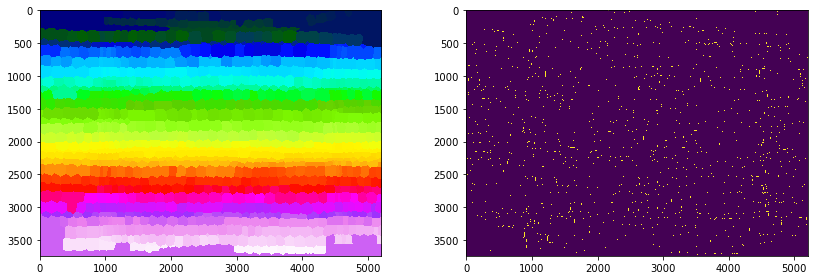

In [6]:
#watershed
GT_im_inv=cv2.bitwise_not(GT_im)
watershed=Watershed_func.watershed()
watershed_postprocessing=Watershed_func.watershed_postprocessing()
nuclei, lines=watershed.watershed_segmentation(GT_im_inv)

#get boundary image
boundary_image=np.uint8(lines*255)

#show result
fig, ax=plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(nuclei, cmap="gist_ncar")
ax[1].imshow(boundary_image)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "Waterhsed_result_after_manual_correction.png"), dpi=1500)
plt.show()

In [7]:
#save all results
np.savez(os.path.join(npz_path, "GT_after_manual_correction.npz"), nuclei=nuclei, boundary_image=boundary_image)